<a href="https://colab.research.google.com/github/utxu/TFM_food_recognition/blob/main/VGG16_feature_extraction_WITH_data_augment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Elegimos una GPU en el entorno

In [14]:
import tensorflow as tf
import keras
tf.test.gpu_device_name()

'/device:GPU:0'

In [15]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.1 GB  | Proc size: 982.6 MB
GPU RAM Free: 14885MB | Used: 224MB | Util   1% | Total 15109MB


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pwd

/content


In [6]:
import os

# Location of Zip File
drive_path = '/content/drive/MyDrive/spanish_food_images.zip'
local_path = '/content'

# Copy the zip file and move it up one level (AKA out of the drive folder)
!cp '{drive_path}' .

# Navigate to the copied file and unzip it quietly
os.chdir(local_path)
!unzip -q 'spanish_food_images.zip'

In [7]:
# Vamos a borrar la copia del .zip porq lo tenemos en la ruta de 'My drive'
! rm -rf spanish_food_images.zip

In [17]:
import keras

In [18]:
from keras.applications.vgg16 import VGG16

In [19]:
conv_base = VGG16(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [20]:
from keras import models
from keras import layers

In [21]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 16,813,124
Trainable params: 16,813,124
Non-trainable params: 0
_________________________________________________________________


In [22]:
base_dir = '/content/spanish_food_images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [24]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150, 150), 
    batch_size=20, 
    class_mode='categorical')

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5), 
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100, 
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)



Found 2000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 83s 344ms/step - loss: 1.0609 - acc: 0.5322 - val_loss: 0.6639 - val_acc: 0.7440
Epoch 2/30
100/100 [==============================] - 34s 337ms/step - loss: 0.5284 - acc: 0.7946 - val_loss: 0.4156 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 34s 337ms/step - loss: 0.4220 - acc: 0.8399 - val_loss: 0.3520 - val_acc: 0.8650
Epoch 4/30
100/100 [==============================] - 34s 337ms/step - loss: 0.3527 - acc: 0.8678 - val_loss: 0.3065 - val_acc: 0.8910
Epoch 5/30
100/100 [==============================] - 34s 336ms/step - loss: 0.2898 - acc: 0.8974 - val_loss: 0.2724 - val_acc: 0.9000
Epoch 6/30
100/100 [==============================] - 34s 336ms/step - loss: 0.2947 - acc: 0.8971 - val_loss: 0.2310 - val_acc: 0.9140
Epoch 7/30
100/100 [==============================] - 34s 336ms/step - loss: 0.2189 - acc: 0.9188 - val_loss: 0.3020 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 3

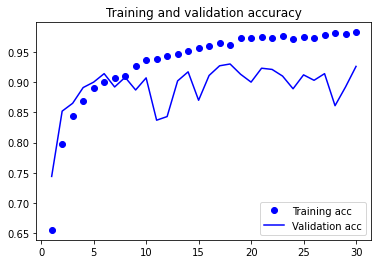

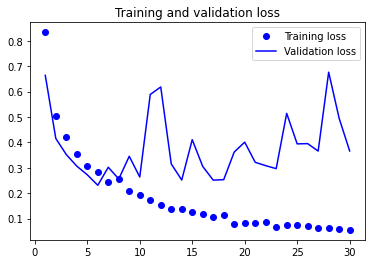

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()